In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def boxsize_to_filesize(boxsize):
    # Pseudosubtomograms for boxsize=240 contain 27.6 GB data.mrc and 27.9 GB weights.mrc per particle
    return (27.6+27.9) * (boxsize/240)**3

In [14]:
number_of_particles = 5500
pixelsize = 3.42
boxsize = 288

filesize = boxsize_to_filesize(boxsize)
total_filesize = number_of_particles * filesize
print(f"Boxsize: {boxsize} pixels, {boxsize*pixelsize} Å")
print(f"Filesize per particle: {filesize/1000.:.4f} GB (16-bit floats)")
print(f"Number of particles: {number_of_particles}")
print(f"Total 16-bit filesize: {total_filesize/1000.:.2f} GB")
print(f"Total 32-bit filesize: {total_filesize*2/1000.:.2f} GB")

Boxsize: 288 pixels, 984.96 Å
Filesize per particle: 0.0959 GB (16-bit floats)
Number of particles: 5500
Total 16-bit filesize: 527.47 GB
Total 32-bit filesize: 1054.94 GB


(-5.0, 100.0)

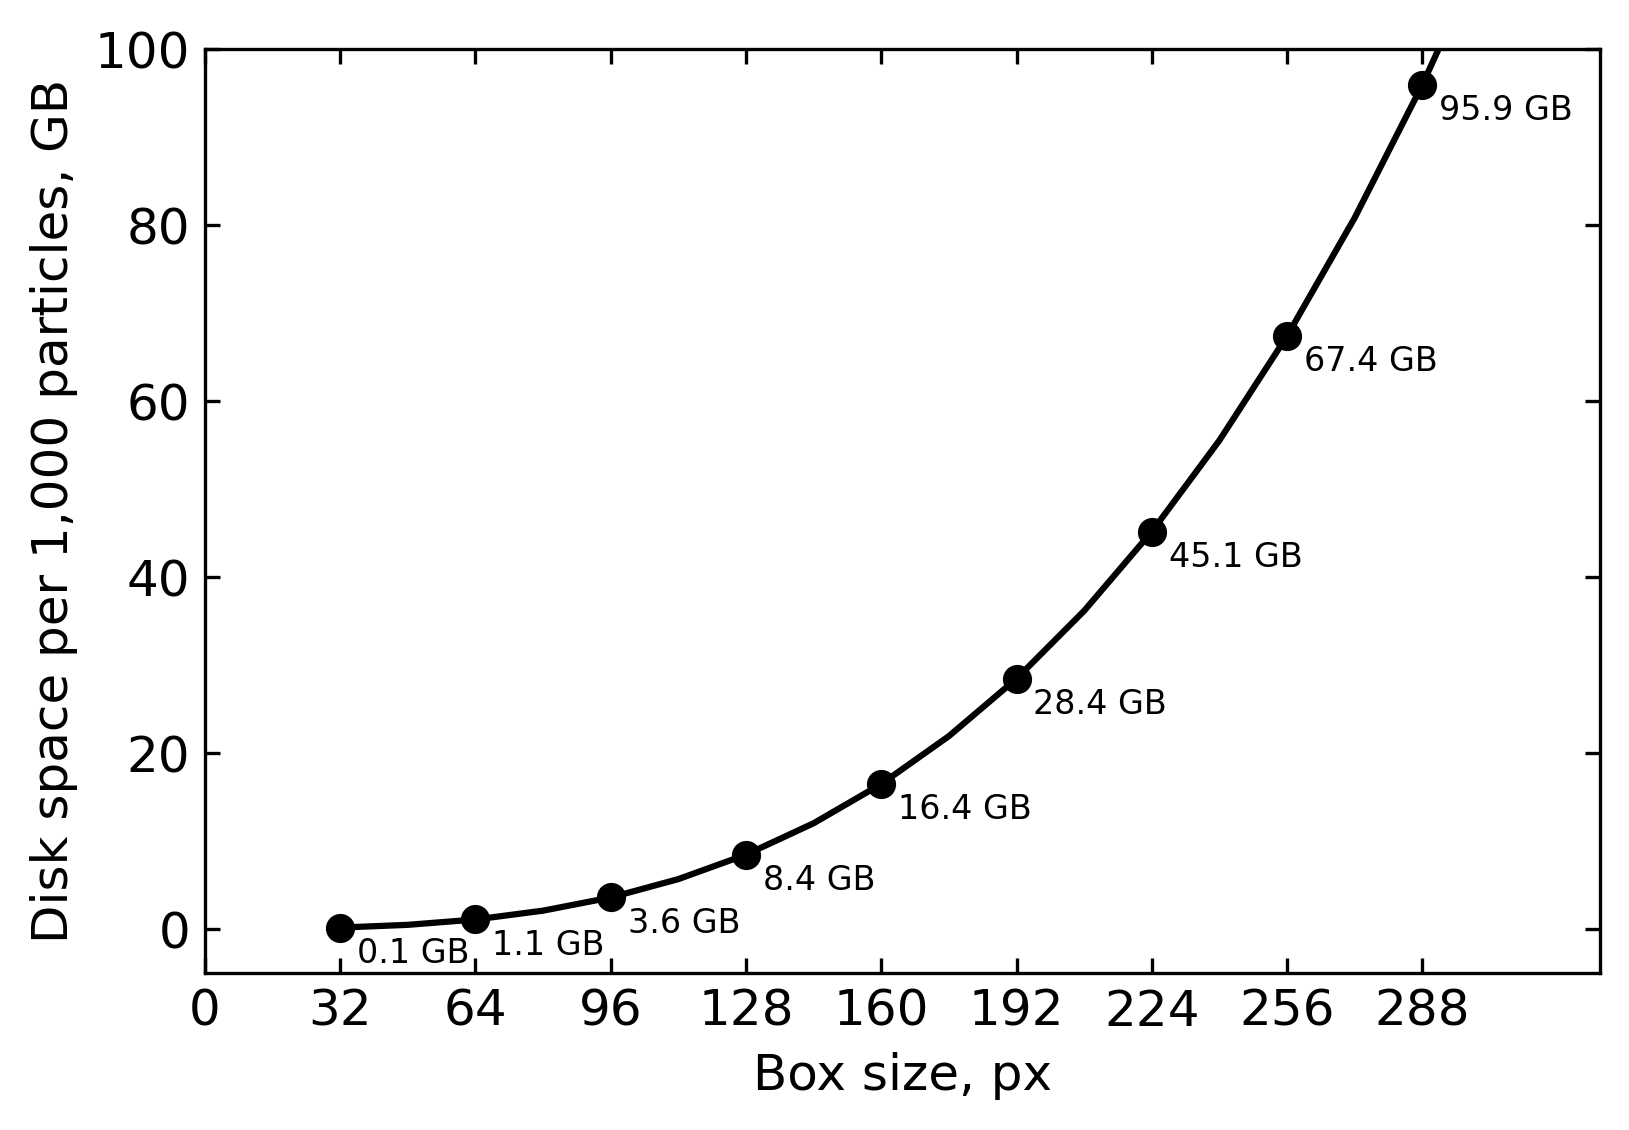

In [4]:
# fig size settings
plt.figure(figsize=(6,4), dpi=300)
plt.rcParams.update({'font.size': 12})


boxsize_data = np.arange(32, 312+16, 16)
filesize_data = boxsize_to_filesize(boxsize_data)

plt.plot(boxsize_data, filesize_data, color='black')
plt.xlabel('Box size, px')
plt.ylabel('Disk space per 1,000 particles, GB')

plt.xticks(np.arange(0, 312, 32))

for i, boxsize in enumerate(boxsize_data[::2]):
    plt.plot(boxsize_data[2*i], filesize_data[2*i], 'ko')
    plt.annotate(f"{boxsize_to_filesize(boxsize):.1f} GB", (boxsize_data[2*i]+4, filesize_data[2*i]-4), fontsize=8)
# show x ticks on top and bottom inside the plot
plt.tick_params(axis='x', direction='in', top=True, )#bottom=True)
plt.tick_params(axis='y', direction='in', right=True, )#left=True)

plt.xlim(0,330)
plt.ylim(-5,100)
